In [ ]:
# Install TensorFlow and Pandas if not already installed
!pip install tensorflow pandas


In [3]:
pip install tensorflow

     -------------------------------------- 377.0/377.0 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 19.0 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 127.7/127.7 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 12.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
     ----------------------------------------


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 10.6/10.6 MB 297.7 kB/s eta 0:00:00
     ------------------------------------ 301.8/301.8 kB 316.2 kB/s eta 0:00:00


In [ ]:
# Install TensorFlow and Pandas if not already installed
!pip install tensorflow pandas


In [ ]:
# Install the necessary packages
!pip install tensorflow scikit-learn pandas matplotlib



Epoch 1/50


C:\Users\91820\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.3431 - val_loss: 0.6630
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6347 - val_loss: 0.5867
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6304 - val_loss: 0.6807
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6229 - val_loss: 0.5700
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6190 - val_loss: 0.5670
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6335 - val_loss: 0.5714
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6136 - val_loss: 0.5679
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6292 - val_loss: 0.5694
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6371 - val_loss: 0.9382
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6037 - val_loss: 0.6025
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6116 - val_loss: 0.5983
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.

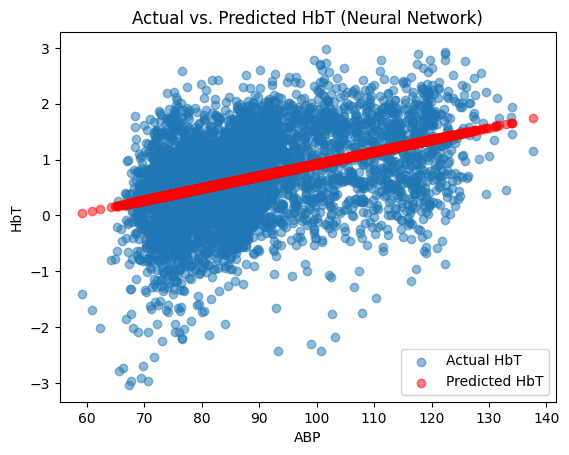

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the Excel file that contains the ABP and HbT data
abp_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"   # Change to your file path
hbt_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"   # Change to your file path

# Load the data from Excel files
df_abp = pd.read_excel(abp_data_path)  # Load ABP data
df_hbt = pd.read_excel(hbt_data_path)  # Load HbT data

# Assuming the columns you need for ABP and HbT are specified
abp = df_abp["blood pressure (mmHg)"].values  # Adjust to your column name
hbt = df_hbt["Ch_8: delta [HbT] (micromolar)"].values  # Adjust to your column name

# Prepare the data for the neural network
abp = abp.reshape(-1, 1)  # Ensure it's 2D, one feature per row

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(abp, hbt, test_size=0.2, random_state=42)

# Build a simple neural network model for regression
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(1,)),  # First hidden layer with 16 neurons
    keras.layers.Dense(16, activation='relu'),  # Second hidden layer
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model with a suitable loss function and optimizer
model.compile(optimizer='adam', loss='mse')  # 'mse' for mean squared error

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss (MSE):", test_loss)

# Predict HbT from ABP using the trained model
predictions = model.predict(X_test)

# Calculate mean squared error to evaluate prediction accuracy
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the relative accuracy in percentage
hbt_range = hbt.max() - hbt.min()  # Range of HbT values
relative_accuracy = 100 * (1 - (mae / hbt_range))  # Calculate relative accuracy as a percentage

print("Relative Accuracy (%):", relative_accuracy)

# Visualize actual vs. predicted values
plt.scatter(X_test, y_test, label="Actual HbT", alpha=0.5)
plt.scatter(X_test, predictions, label="Predicted HbT", alpha=0.5, color='r')
plt.xlabel("ABP")
plt.ylabel("HbT")
plt.legend()
plt.title("Actual vs. Predicted HbT (Neural Network)")
plt.show()


R^2 (Coefficient of Determination): 16.549549810542572 %
Mean Squared Error (MSE): 0.5443217958364566
Mean Absolute Error (MAE): 0.587397614136487
Relative Accuracy (%): 90.6303331484876


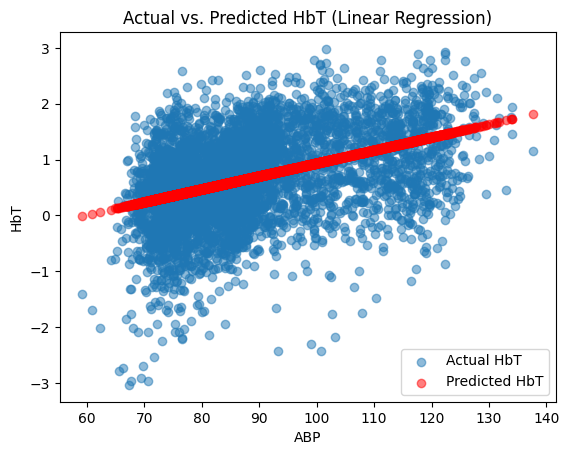

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read the Excel files containing ABP and HbT data
abp_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Adjust to your file path
hbt_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Adjust to your file path

# Load the data from Excel files
df_abp = pd.read_excel(abp_data_path)  # Load ABP data
df_hbt = pd.read_excel(hbt_data_path)  # Load HbT data

# Extract the specified columns for ABP and HbT
abp = df_abp["blood pressure (mmHg)"].values  # Adjust to your column name
hbt = df_hbt["Ch_8: delta [HbT] (micromolar)"].values  # Adjust to your column name

# Prepare the data for the linear regression model
abp = abp.reshape(-1, 1)  # Ensure it's 2D, one feature per row

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(abp, hbt, test_size=0.2, random_state=42)

# Create a linear regression model
linear_regression = LinearRegression()

# Train the model with the training set
linear_regression.fit(X_train, y_train)

# Evaluate the model on the test set
test_loss = linear_regression.score(X_test, y_test)  # R^2 score
print("R^2 (Coefficient of Determination):", test_loss * 100, "%")  # Convert to percentage

# Predict the HbT values for the test set
predictions = linear_regression.predict(X_test)

# Calculate additional metrics for accuracy
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate relative accuracy in percentage
hbt_range = hbt.max() - hbt.min()  # Calculate the range of HbT values
relative_accuracy = 100 * (1 - (mae / hbt_range))  # Calculate relative accuracy as a percentage
print("Relative Accuracy (%):", relative_accuracy)

# Visualize actual vs. predicted values
plt.scatter(X_test, y_test, label="Actual HbT", alpha=0.5)
plt.scatter(X_test, predictions, label="Predicted HbT", alpha=0.5, color='r')
plt.xlabel("ABP")
plt.ylabel("HbT")
plt.legend()
plt.title("Actual vs. Predicted HbT (Linear Regression)")
plt.show()


C:\Users\91820\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.3556 - val_loss: 0.6820
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7348 - val_loss: 0.6788
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6617 - val_loss: 0.6510
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6369 - val_loss: 0.7323
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6345 - val_loss: 0.6260
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6075 - val_loss: 0.6011
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6017 - val_loss: 0.6296
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6119 - val_loss: 0.7513
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5933 - val_loss: 0.6401
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5949 - val_loss: 0.5920
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5920 - val_loss: 0.7247
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

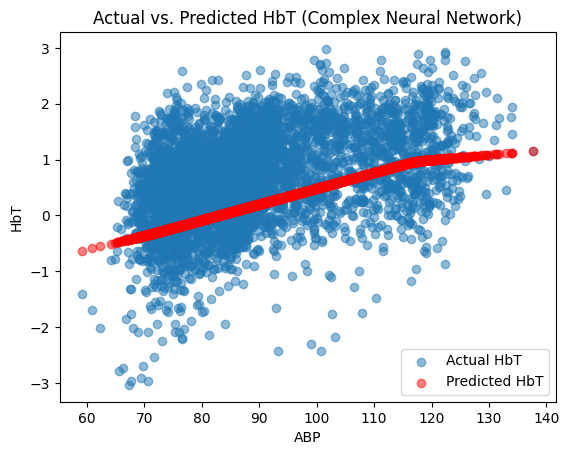

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the Excel file that contains the ABP and HbT data
abp_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Change to your file path
hbt_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Change to your file path

# Load the data from Excel files
df_abp = pd.read_excel(abp_data_path)  # Load ABP data
df_hbt = pd.read_excel(hbt_data_path)  # Load HbT data

# Extract ABP and HbT data
abp = df_abp["blood pressure (mmHg)"].values
hbt = df_hbt["Ch_8: delta [HbT] (micromolar)"].values

# Prepare the data
abp = abp.reshape(-1, 1)  # Make sure it's 2D for the neural network
X_train, X_test, y_train, y_test = train_test_split(abp, hbt, test_size=0.2, random_state=42)

# Build a complex neural network model for regression
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(1,)),  # More neurons in the first hidden layer
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(32, activation='relu'),  # Additional hidden layers
    keras.layers.Dense(32, activation='relu'),  # Extra hidden layer for complexity
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for regression

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss (MSE):", test_loss)

# Predict HbT from ABP using the trained model
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate the relative accuracy in percentage
hbt_range = hbt.max() - hbt.min()  # Range of HbT values
relative_accuracy = 100 * (1 - (mae / hbt_range))  # Relative accuracy as a percentage

print("Relative Accuracy (%):", relative_accuracy)

# Visualize actual vs. predicted values
plt.scatter(X_test, y_test, label="Actual HbT", alpha=0.5)
plt.scatter(X_test, predictions, label="Predicted HbT", alpha=0.5, color='r')
plt.xlabel("ABP")
plt.ylabel("HbT")
plt.legend()
plt.title("Actual vs. Predicted HbT (Complex Neural Network)")
plt.show()
